#  Predicting the Sale Price of Bulldozers Using Machine Learning
 
**In this notebook, We're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.**

# 1.Problem Definition

>> How well can we predict the future sales price of a bulldozer, given its characteristics and previous examples of how much similar bulldozer have been sold for ?


# 2.Data

The data is downloaded from the Kaggle Bluebook for Bulldozer Competition.

For more details on the data check : https://www.kaggle.com/c/bluebook-for-bulldozers/data

**The data for this competition is split into three parts:**


* Train.csv is the training set, which contains data through the end of 2011.

* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set     throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 -   November 2012. Your score on the test set determines your final rank for the competition.

* The key fields are in train.csv are:

* SalesID: the uniue identifier of the sale
* MachineID: the unique identifier of a machine.  A machine can be sold multiple times
* saleprice: what the machine sold for at auction (only provided in train.csv)
* saledate: the date of the sale


# 3.Evaluations

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation on this project check : 

https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note :** `The goal for most regression evaluation metrics is to minimize the error. For example ,our goal for this project will be to build a machine learning model which minimises RMSLE`


# 4.Features

Kaggle provides a data dictionary detailling all of the features of the dataset.You can view this data dictionary on Google Sheets:

https://docs.google.com/spreadsheets/d/1IdcbVP7o2l7xjGnG7Mo4WuRXl4NMrnfWnTrer92sVZE/edit?usp=sharing



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn

In [ ]:
#!conda install seaborn

In [2]:
#Import the training and validation sets
df=pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [6]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

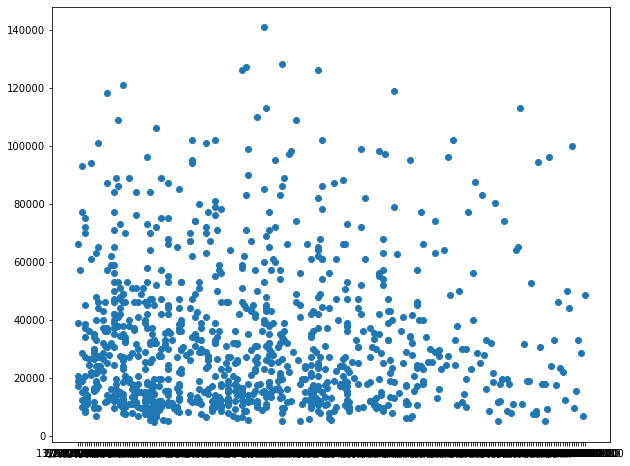

In [7]:
fig,ax=plt.subplots(figsize=(10,8))
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [8]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

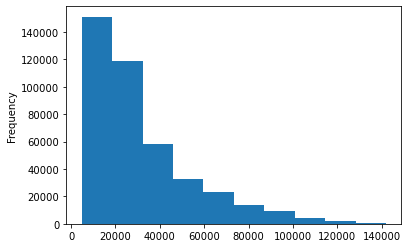

In [9]:
df.SalePrice.plot.hist();

### Parsing dates

When we work with time series data, we want to enrich the time and date components as much as possible.

We can do that by telling pandas which of our columns has dates in it. 

Using `parse_dates`parameter .

In [10]:
#Import data again but time parse dates
df=pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])


In [11]:
df.saledate.dtype

dtype('<M8[ns]')

In [12]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

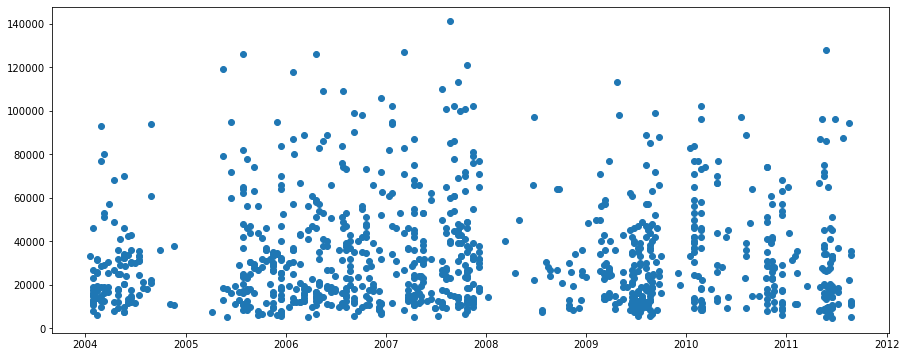

In [13]:
fig,ax=plt.subplots(figsize=(15,6))
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

In [14]:
df.head()

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1139246    66000.0     999089     3157         121           3.0      2004   
1  1139248    57000.0     117657       77         121           3.0      1996   
2  1139249    10000.0     434808     7009         121           3.0      2001   
3  1139251    38500.0    1026470      332         121           3.0      2001   
4  1139253    11000.0    1057373    17311         121           3.0      2007   

   MachineHoursCurrentMeter UsageBand   saledate  ... Undercarriage_Pad_Width  \
0                      68.0       Low 2006-11-16  ...                     NaN   
1                    4640.0       Low 2004-03-26  ...                     NaN   
2                    2838.0      High 2004-02-26  ...                     NaN   
3                    3486.0      High 2011-05-19  ...                     NaN   
4                     722.0    Medium 2009-07-23  ...                     NaN   

  Stick_Length Thumb Pattern_Changer Grouser_Type Backhoe_Mounting Blade_Type  \
0          NaN   NaN             NaN          NaN              NaN        NaN   
1          NaN   NaN             NaN          NaN              NaN        NaN   
2          NaN   NaN             NaN          NaN              NaN        NaN   
3          NaN   NaN             NaN          NaN              NaN        NaN   
4          NaN   NaN             NaN          NaN              NaN        NaN   

  Travel_Controls Differential_Type Steering_Controls  
0             NaN          Standard      Conventional  
1             NaN          Standard      Conventional  
2             NaN               NaN               NaN  
3             NaN               NaN               NaN  
4             NaN               NaN               NaN  

[5 rows x 53 columns]

In [15]:
df.head().T

0  \
SalesID                                                    1139246   
SalePrice                                                  66000.0   
MachineID                                                   999089   
ModelID                                                       3157   
datasource                                                     121   
auctioneerID                                                   3.0   
YearMade                                                      2004   
MachineHoursCurrentMeter                                      68.0   
UsageBand                                                      Low   
saledate                                       2006-11-16 00:00:00   
fiModelDesc                                                   521D   
fiBaseModel                                                    521   
fiSecondaryDesc                                                  D   
fiModelSeries                                                  NaN   
fiModelDescriptor                                              NaN   
ProductSize                                                    NaN   
fiProductClassDesc        Wheel Loader - 110.0 to 120.0 Horsepower   
state                                                      Alabama   
ProductGroup                                                    WL   
ProductGroupDesc                                      Wheel Loader   
Drive_System                                                   NaN   
Enclosure                                               EROPS w AC   
Forks                                          None or Unspecified   
Pad_Type                                                       NaN   
Ride_Control                                   None or Unspecified   
Stick                                                          NaN   
Transmission                                                   NaN   
Turbocharged                                                   NaN   
Blade_Extension                                                NaN   
Blade_Width                                                    NaN   
Enclosure_Type                                                 NaN   
Engine_Horsepower                                              NaN   
Hydraulics                                                 2 Valve   
Pushblock                                                      NaN   
Ripper                                                         NaN   
Scarifier                                                      NaN   
Tip_Control                                                    NaN   
Tire_Size                                      None or Unspecified   
Coupler                                        None or Unspecified   
Coupler_System                                                 NaN   
Grouser_Tracks                                                 NaN   
Hydraulics_Flow                                                NaN   
Track_Type                                                     NaN   
Undercarriage_Pad_Width                                        NaN   
Stick_Length                                                   NaN   
Thumb                                                          NaN   
Pattern_Changer                                                NaN   
Grouser_Type                                                   NaN   
Backhoe_Mounting                                               NaN   
Blade_Type                                                     NaN   
Travel_Controls                                                NaN   
Differential_Type                                         Standard   
Steering_Controls                                     Conventional   

                                                                 1  \
SalesID                                                    1139248   
SalePrice                                                  57000.0   
MachineID                                                   117657   
Mode

In [16]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by salesdata

When working with timeseries data , it's a good idea to sort it by date.


In [17]:
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original of the DataFrame

We make a copy of the original dataframe so when we manipulate the copy,we've still got our original data.

In [18]:
#Make a copy
df_temp=df.copy()

### Add a datetime paramters for `saledate` column

In [19]:
df_temp["saleYear"]=df_temp.saledate.dt.year
df_temp["saleMonth"]=df_temp.saledate.dt.month
df_temp["saleDay"]=df_temp.saledate.dt.day
df_temp["saleDayOfWeek"]=df_temp.saledate.dt.dayofweek
df_temp["saleDayofYear"]=df_temp.saledate.dt.dayofyear

In [20]:
df_temp.head().T

205615  \
SalesID                                                             1646770   
SalePrice                                                            9500.0   
MachineID                                                           1126363   
ModelID                                                                8434   
datasource                                                              132   
auctioneerID                                                           18.0   
YearMade                                                               1974   
MachineHoursCurrentMeter                                                NaN   
UsageBand                                                               NaN   
saledate                                                1989-01-17 00:00:00   
fiModelDesc                                                            TD20   
fiBaseModel                                                            TD20   
fiSecondaryDesc                                                         NaN   
fiModelSeries                                                           NaN   
fiModelDescriptor                                                       NaN   
ProductSize                                                          Medium   
fiProductClassDesc        Track Type Tractor, Dozer - 105.0 to 130.0 Hor...   
state                                                                 Texas   
ProductGroup                                                            TTT   
ProductGroupDesc                                        Track Type Tractors   
Drive_System                                                            NaN   
Enclosure                                                             OROPS   
Forks                                                                   NaN   
Pad_Type                                                                NaN   
Ride_Control                                                            NaN   
Stick                                                                   NaN   
Transmission                                                   Direct Drive   
Turbocharged                                                            NaN   
Blade_Extension                                                         NaN   
Blade_Width                                                             NaN   
Enclosure_Type                                                          NaN   
Engine_Horsepower                                                       NaN   
Hydraulics                                                          2 Valve   
Pushblock                                                               NaN   
Ripper                                                  None or Unspecified   
Scarifier                                                               NaN   
Tip_Control                                                             NaN   
Tire_Size                                                               NaN   
Coupler                                                                 NaN   
Coupler_System                                                          NaN   
Grouser_Tracks                                                          NaN   
Hydraulics_Flow                                                         NaN   
Track_Type                                                              NaN   
Undercarriage_Pad_Width                                                 NaN   
Stick_Length                                                            NaN   
Thumb                                                                   NaN   
Pattern_Changer                                                         NaN   
Grouser_Type                                                            NaN   
Backhoe_Mounting                                        None or Unspecified   
Blade_Type                                                         Straight   
Travel_Controls                         

In [21]:
#Now we have enriched our DataFrame with date time features,we can remove the saledate column
df_temp.drop("saledate",axis=1,inplace=True)

In [22]:
#Check the values of different columns
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5.Modelling

We have done enough EDA(we could always do more) but let's start to do some more model-driven EDA.

In [23]:
#Let's build a machine learning model

from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_jobs=-1,
                            random_state=42)

model.fit(df_temp.drop("SalePrice",axis=1),df["SalePrice"])

ValueError: could not convert string to float: 'Low'

In [24]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Convert string into Categories
One way we can turn all our data into numbers is by converting them into panda categories.

We can check the different datatypes compatible with pandas here :
https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality

In [25]:
df_temp.head().T

205615  \
SalesID                                                             1646770   
SalePrice                                                            9500.0   
MachineID                                                           1126363   
ModelID                                                                8434   
datasource                                                              132   
auctioneerID                                                           18.0   
YearMade                                                               1974   
MachineHoursCurrentMeter                                                NaN   
UsageBand                                                               NaN   
fiModelDesc                                                            TD20   
fiBaseModel                                                            TD20   
fiSecondaryDesc                                                         NaN   
fiModelSeries                                                           NaN   
fiModelDescriptor                                                       NaN   
ProductSize                                                          Medium   
fiProductClassDesc        Track Type Tractor, Dozer - 105.0 to 130.0 Hor...   
state                                                                 Texas   
ProductGroup                                                            TTT   
ProductGroupDesc                                        Track Type Tractors   
Drive_System                                                            NaN   
Enclosure                                                             OROPS   
Forks                                                                   NaN   
Pad_Type                                                                NaN   
Ride_Control                                                            NaN   
Stick                                                                   NaN   
Transmission                                                   Direct Drive   
Turbocharged                                                            NaN   
Blade_Extension                                                         NaN   
Blade_Width                                                             NaN   
Enclosure_Type                                                          NaN   
Engine_Horsepower                                                       NaN   
Hydraulics                                                          2 Valve   
Pushblock                                                               NaN   
Ripper                                                  None or Unspecified   
Scarifier                                                               NaN   
Tip_Control                                                             NaN   
Tire_Size                                                               NaN   
Coupler                                                                 NaN   
Coupler_System                                                          NaN   
Grouser_Tracks                                                          NaN   
Hydraulics_Flow                                                         NaN   
Track_Type                                                              NaN   
Undercarriage_Pad_Width                                                 NaN   
Stick_Length                                                            NaN   
Thumb                                                                   NaN   
Pattern_Changer                                                         NaN   
Grouser_Type                                                            NaN   
Backhoe_Mounting                                        None or Unspecified   
Blade_Type                                                         Straight   
Travel_Controls                                         None or Unspecified   
Differential_Type                       

In [26]:
pd.api.types.is_string_dtype(df_temp["UsageBand"])

True

In [27]:
#Find the columns which contain strings
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [28]:
# If you are worndering what df.items() does ,here's an example
random_dict={"key1":"hello",
            "key2":"world!"}

for key,value in random_dict.items():
    print(f"this is key : {key}",
          f"this is value : {value}")
    

this is key : key1 this is value : hello
this is key : key2 this is value : world!


In [29]:
#This will turn all of the strings value into category values
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label]=content.astype("category").cat.as_ordered()

In [30]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [32]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [33]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Thanks to pandas catagories we now have a ways to access all of our data in the form of numbers.

But we still have a bunch of missing data....

In [34]:
#check missing data
df_temp.isna().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

# Save Preprocessed data

In [35]:
#Export current tmp dataframe
df_temp.to_csv("data/bluebook-for-bulldozers/train_tmp.csv",
           index=False)

In [36]:
#Import preprocessed data
df_temp=pd.read_csv("data/bluebook-for-bulldozers/train_tmp.csv",low_memory=False)
df_temp.head()

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1646770     9500.0    1126363     8434         132          18.0      1974   
1  1821514    14000.0    1194089    10150         132          99.0      1980   
2  1505138    50000.0    1473654     4139         132          99.0      1978   
3  1671174    16000.0    1327630     8591         132          99.0      1980   
4  1329056    22000.0    1336053     4089         132          99.0      1984   

   MachineHoursCurrentMeter UsageBand fiModelDesc  ...     Backhoe_Mounting  \
0                       NaN       NaN        TD20  ...  None or Unspecified   
1                       NaN       NaN         A66  ...                  NaN   
2                       NaN       NaN         D7G  ...  None or Unspecified   
3                       NaN       NaN         A62  ...                  NaN   
4                       NaN       NaN         D3B  ...  None or Unspecified   

  Blade_Type      Travel_Controls Differential_Type Steering_Controls  \
0   Straight  None or Unspecified               NaN               NaN   
1        NaN                  NaN          Standard      Conventional   
2   Straight  None or Unspecified               NaN               NaN   
3        NaN                  NaN          Standard      Conventional   
4        PAT                Lever               NaN               NaN   

  saleYear saleMonth saleDay saleDayOfWeek saleDayofYear  
0     1989         1      17             1            17  
1     1989         1      31             1            31  
2     1989         1      31             1            31  
3     1989         1      31             1            31  
4     1989         1      31             1            31  

[5 rows x 57 columns]

In [37]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Fill missing values

### Fill Numeric missing values first

In [38]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayofYear


In [39]:
df_temp.ModelID

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [40]:
# Check for which numeric columns have null values
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [41]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            ## Add a binary column which tells us if the data was missing or not
            df_temp[label+"_is_missing"]=pd.isnull(content)
            #Fill missing numeric value with median
            df_temp[label]=content.fillna(content.median())
            
            

In [42]:
#Demonstrate how median is more robust than mean
hundreds=np.full((1000,),100)
hundreds_billion=np.append(hundreds,1000000000)
np.mean(hundreds),np.mean(hundreds_billion),np.median(hundreds),np.median(hundreds_billion)

(100.0, 999100.8991008991, 100.0, 100.0)

In [43]:
#Check if there is any null numeric values
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [44]:
df_temp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [45]:
df_temp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and turning categorical variables into numbers

In [46]:
#Check for columns which aren't numeric
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [47]:
#Turn Categorical variables into numbers and fill missing
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add binary column to indicate whether sample had missing value
        df_temp[label+"is_missing"]=pd.isnull(content)#Return true or false
        #Turn categories into numbers and add+1
        df_temp[label]=pd.Categorical(content).codes+1

In [48]:
pd.Categorical(df_temp["UsageBand"]).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [49]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controlsis_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [50]:
df_temp.head().T

0        1        2        3        4
SalesID                      1646770  1821514  1505138  1671174  1329056
SalePrice                     9500.0  14000.0  50000.0  16000.0  22000.0
MachineID                    1126363  1194089  1473654  1327630  1336053
ModelID                         8434    10150     4139     8591     4089
datasource                       132      132      132      132      132
...                              ...      ...      ...      ...      ...
Backhoe_Mountingis_missing     False     True    False     True    False
Blade_Typeis_missing           False     True    False     True    False
Travel_Controlsis_missing      False     True    False     True    False
Differential_Typeis_missing     True    False     True    False     True
Steering_Controlsis_missing     True    False     True    False     True

[103 rows x 5 columns]

In [ ]:
#Missing no were initially -1 now it changes into 0 and non_null values are turned into value+1

In [83]:
#Now we have turned the categorical value into some numbers and also filled the missing value with zeros  

Engine_Horsepower                      0
Hydraulics                             0
Pushblock                              0
Ripper                                 0
Scarifier                              0
Tip_Control                            0
Tire_Size                              0
Coupler                                0
Coupler_System                         0
Grouser_Tracks                         0
Hydraulics_Flow                        0
Track_Type                             0
Undercarriage_Pad_Width                0
Stick_Length                           0
Thumb                                  0
Pattern_Changer                        0
Grouser_Type                           0
Backhoe_Mounting                       0
Blade_Type                             0
Travel_Controls                        0
Differential_Type                      0
Steering_Controls                      0
saleYear                               0
saleMonth                              0
saleDay         

In [51]:
len(df_temp)

412698

Now that all of our data is numeric as well as our dataframe has no missing values , we should be able to build a machine earning model.

In [57]:
%%time
#Instantiate model 
model=RandomForestRegressor(n_jobs=-1,random_state=42)

#Fit the model
model.fit(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])

Wall time: 11min 10s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [58]:
#Score the model
model.score(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])

0.9875468079970562

**Question :** Why does not above metric hold water ?(why is not is metric reliable) 

**Answer    :** We fit and evaluated on the same data.we want our model to be generalize.

## Splitting data into train/validation sets

In [59]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controlsis_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [60]:
df_temp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [61]:
#Split data into training and validation
df_val=df_temp[df_temp.saleYear==2012]
df_train=df_temp[df_temp.saleYear!=2012]

len(df_val),len(df_train)

(11573, 401125)

In [62]:
# Split data into X & y
X_train,y_train=df_train.drop("SalePrice",axis=1),df_train.SalePrice
X_valid,y_valid=df_val.drop("SalePrice",axis=1),df_val.SalePrice
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [63]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

In [64]:
y_valid

401125    46173.2
401126    66000.0
401127    26800.0
401128    42100.0
401129    62100.0
           ...   
412693    16000.0
412694     6000.0
412695    16000.0
412696    55000.0
412697    34000.0
Name: SalePrice, Length: 11573, dtype: float64

## Building an evaluation function

In [65]:
#Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    """
    Calculate root mean squared log error between predictions and true labels.
    
    """

    return np.sqrt(mean_squared_log_error(y_test,y_preds))

#Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds=model.predict(X_train)
    val_preds=model.predict(X_valid)
    scores={"Training MAE":mean_absolute_error(y_train,train_preds),
            "Valid MAE":mean_absolute_error(y_valid,val_preds),
            "Training RMSLE":rmsle(y_train,train_preds),
            "Valid RMSLE" :rmsle(y_valid,val_preds),
            "Training R^2" : r2_score(y_train,train_preds),
            "Valid R^ 2":r2_score(y_valid,val_preds)
           }
    return scores

## Testing our model on a subset (to tune the hyperparamters)

In [ ]:
#This will take a lot time
#%%time
#model= RandomForestRegressor(n_jobs=-1,
#                             random_state=42)
#model.fit(X_train,y_train)

In [66]:
len(X_train)

401125

In [67]:
# Change max samples value
model=RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)

In [68]:
%%time
#Cutting down on the max number of samples each estimator can see to improve time
model.fit(X_train,y_train)

Wall time: 37.9 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [69]:
X_train.shape[0]*100

40112500

In [66]:
10000*100

1000000

In [70]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^ 2': 0.8320374995090507}

In [80]:
%%time
### HyperParameter Tuning with RandomizedSearchCV


from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparamters
rf_grid={"n_estimators":np.arange(10,100,10),
        "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2),
         "max_features":[0.5,1,"sqrt","auto"],
         "max_samples":[10000]
        }

#Instantiate RandomizedSearchCV model
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                 random_state=42),
                           param_distributions=rf_grid,
                           n_iter=2,
                           cv=5,
                           verbose=True)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Wall time: 3min 30s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [82]:
#Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 10}

In [84]:
#Evaluate the randomizedSearch model
show_scores(rs_model)

{'Training MAE': 6481.692809807114,
 'Valid MAE': 7807.409791754319,
 'Training RMSLE': 0.292027769138127,
 'Valid RMSLE': 0.3131332052749581,
 'Training R^2': 0.819139474145285,
 'Valid R^ 2': 0.800380759593285}

### Train a model with the best hyperparameters

**Note:** These were found after 100 iteration of RandomizedSearchCV

In [87]:
%%time
#Most ideal hyperparamters
ideal_model= RandomForestRegressor(n_estimators=40,
                                  min_samples_leaf=1,
                                  min_samples_split=14,
                                  max_features=0.5,
                                  n_jobs=-1,
                                  max_samples=None,
                                  random_state=42)

#Fit the ideal model
ideal_model.fit(X_train,y_train)

Wall time: 2min 4s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [88]:
#Scores on ideal model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371858,
 'Valid RMSLE': 0.24524163989538328,
 'Training R^2': 0.9588145522577225,
 'Valid R^ 2': 0.8818019502450094}

In [89]:
#Scores on rs_model (only trained on -10,000 examples)
show_scores(rs_model)

{'Training MAE': 6481.692809807114,
 'Valid MAE': 7807.409791754319,
 'Training RMSLE': 0.292027769138127,
 'Valid RMSLE': 0.3131332052749581,
 'Training R^2': 0.819139474145285,
 'Valid R^ 2': 0.800380759593285}

## Make prediction on test data

In [131]:
#Import the test data
df_test=pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                   low_memory=False,
                   parse_dates=["saledate"])
df_test.head()


SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1227829    1006309     3168         121             3      1999   
1  1227844    1022817     7271         121             3      1000   
2  1227847    1031560    22805         121             3      2004   
3  1227848      56204     1269         121             3      2006   
4  1227863    1053887    22312         121             3      2005   

   MachineHoursCurrentMeter UsageBand   saledate fiModelDesc  ...  \
0                    3688.0       Low 2012-05-03        580G  ...   
1                   28555.0      High 2012-05-10         936  ...   
2                    6038.0    Medium 2012-05-10    EC210BLC  ...   
3                    8940.0      High 2012-05-10       330CL  ...   
4                    2286.0       Low 2012-05-10        650K  ...   

  Undercarriage_Pad_Width         Stick_Length   Thumb      Pattern_Changer  \
0                     NaN                  NaN     NaN                  NaN   
1                     NaN                  NaN     NaN                  NaN   
2     None or Unspecified                9' 6"  Manual  None or Unspecified   
3     None or Unspecified  None or Unspecified  Manual                  Yes   
4                     NaN                  NaN     NaN                  NaN   

  Grouser_Type     Backhoe_Mounting Blade_Type      Travel_Controls  \
0          NaN                  NaN        NaN                  NaN   
1          NaN                  NaN        NaN                  NaN   
2       Double                  NaN        NaN                  NaN   
3       Triple                  NaN        NaN                  NaN   
4          NaN  None or Unspecified        PAT  None or Unspecified   

  Differential_Type Steering_Controls  
0               NaN               NaN  
1          Standard      Conventional  
2               NaN               NaN  
3               NaN               NaN  
4               NaN               NaN  

[5 rows x 52 columns]

In [91]:
#Make prediction on the test dataset
test_preds=ideal_model.predict(df_test)

ValueError: could not convert string to float: 'Low'

In [132]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [133]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [134]:
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [140]:
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Widthis_missing', 'Stick_Lengthis_missing',
       'Thumbis_missing', 'Pattern_Changeris_missing',
       'Grouser_Typeis_missing', 'Backhoe_Mountingis_missing',
       'Blade_Typeis_missing', 'Travel_Controlsis_missing',
       'Differential_Typeis_missing', 'Steering_Controlsis_missing'],
      dtype='object', length=102)

In [148]:
## Preprocessing the data (getting the test dataset in the smae format as our training dataset)
def preprocess_data(df):
    """
    Perform transformation on df and returns transformed df.
    
    """
    df["saleYear"]=df.saledate.dt.year
    df["saleMonth"]=df.saledate.dt.month
    df["saleDay"]=df.saledate.dt.day
    df["saleDayOfWeek"]=df.saledate.dt.dayofweek
    df["saleDayofYear"]=df.saledate.dt.dayofyear
    
    df.drop("saledate",axis=1,inplace=True)
    
    #Fill the missing numerical values
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
            ## Add a binary column which tells us if the data was missing or not
                df[label+"is_missing"]=pd.isnull(content)
            #Fill missing numeric value with median
                df[label]=content.fillna(content.median())
            
    #Fill missing categorical data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
                df[label+"is_missing"]=pd.isnull(content)
            #We add +1 to the category code because pandas encodes missing value with -1
                df[label]=pd.Categorical(content).codes+1
            
    
    return df

In [149]:
#Processed test data
df_test=preprocess_data(df_test)
df_test.head()

AttributeError: 'DataFrame' object has no attribute 'saledate'

In [144]:
#Make prediction on updated test data
test_preds=ideal_model.predict(df_test)

ValueError: X has 101 features, but DecisionTreeRegressor is expecting 102 features as input.

In [150]:
#We can find how the columns differ using sets
set(X_train.columns)-set(df_test.columns)

{'MachineHoursCurrentMeter_is_missing', 'auctioneerID_is_missing'}

In [151]:
#Manually adjust df_test to have auctioneerID is missing coulmn
df_test['auctioneerID_is_missing']=False
df_test.head()

SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1227829    1006309     3168         121             3      1999   
1  1227844    1022817     7271         121             3      1000   
2  1227847    1031560    22805         121             3      2004   
3  1227848      56204     1269         121             3      2006   
4  1227863    1053887    22312         121             3      2005   

   MachineHoursCurrentMeter  UsageBand  fiModelDesc  fiBaseModel  ...  \
0                    3688.0          2          499          180  ...   
1                   28555.0          1          831          292  ...   
2                    6038.0          3         1177          404  ...   
3                    8940.0          1          287          113  ...   
4                    2286.0          2          566          196  ...   

   Stick_Lengthis_missing  Thumbis_missing  Pattern_Changeris_missing  \
0                    True             True                       True   
1                    True             True                       True   
2                   False            False                      False   
3                   False            False                      False   
4                    True             True                       True   

   Grouser_Typeis_missing  Backhoe_Mountingis_missing  Blade_Typeis_missing  \
0                    True                        True                  True   
1                    True                        True                  True   
2                   False                        True                  True   
3                   False                        True                  True   
4                    True                       False                 False   

   Travel_Controlsis_missing  Differential_Typeis_missing  \
0                       True                         True   
1                       True                        False   
2                       True                         True   
3                       True                         True   
4                      False                         True   

   Steering_Controlsis_missing  auctioneerID_is_missing  
0                         True                    False  
1                        False                    False  
2                         True                    False  
3                         True                    False  
4                         True                    False  

[5 rows x 102 columns]

Finally we have same coln on test and train dataset

In [153]:
test_preds=ideal_model.predict(df_test)

In [154]:
test_preds

array([20614.36780887, 19897.80170658, 44852.21959446, ...,
       14296.98620472, 22164.85757662, 31683.80063427])

In [156]:
#Format prediction into same format as Kaggle is after
df_preds=pd.DataFrame()
df_preds["SalesID"]=df_test["SalesID"]
df_preds["SalesPrice"]=test_preds
df_preds

SalesID    SalesPrice
0      1227829  20614.367809
1      1227844  19897.801707
2      1227847  44852.219594
3      1227848  68346.325323
4      1227863  39487.349708
...        ...           ...
12452  6643171  46466.092910
12453  6643173  17500.493352
12454  6643184  14296.986205
12455  6643186  22164.857577
12456  6643196  31683.800634

[12457 rows x 2 columns]

In [157]:
#Export Predition data to CSV
df_preds.to_csv("data/bluebook-for-bulldozers/test_predictions.csv")
#Since we do not have the ground truth label for test data set i.e Class label is not given here so we can not evaluate on test data set , but we have done it on evaluation data set already.

# Feature importance

Feature importance seeks to figure out which different attributes of the data were most importance when it comes to
predicting its target

In [161]:
#Find feature importance of our best model
ideal_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [162]:
X_train

SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0       1646770    1126363     8434         132          18.0      1974   
1       1821514    1194089    10150         132          99.0      1980   
2       1505138    1473654     4139         132          99.0      1978   
3       1671174    1327630     8591         132          99.0      1980   
4       1329056    1336053     4089         132          99.0      1984   
...         ...        ...      ...         ...           ...       ...   
401120  6260687    1074871     4331         149           2.0      1000   
401121  6312170    1812622     9580         149           2.0      2005   
401122  6312727    1811599     9580         149           2.0      2005   
401123  6315051    1858173    17432         149           2.0      2004   
401124  6260878    1799594     4102         149           2.0      1000   

        MachineHoursCurrentMeter  UsageBand  fiModelDesc  fiBaseModel  ...  \
0                            0.0          0         4593         1744  ...   
1                            0.0          0         1820          559  ...   
2                            0.0          0         2348          713  ...   
3                            0.0          0         1819          558  ...   
4                            0.0          0         2119          683  ...   
...                          ...        ...          ...          ...  ...   
401120                       0.0          0         3137         1055  ...   
401121                       0.0          0         4514         1684  ...   
401122                       0.0          0         4514         1684  ...   
401123                       0.0          0         3389         1175  ...   
401124                       0.0          0         2161          692  ...   

        Undercarriage_Pad_Widthis_missing  Stick_Lengthis_missing  \
0                                    True                    True   
1                                    True                    True   
2                                    True                    True   
3                                    True                    True   
4                                    True                    True   
...                                   ...                     ...   
401120                               True                    True   
401121                               True                    True   
401122                               True                    True   
401123                               True                    True   
401124                               True                    True   

        Thumbis_missing  Pattern_Changeris_missing  Grouser_Typeis_missing  \
0                  True                       True                    True   
1                  True                       True                    True   
2                  True                       True                    True   
3                  True                       True                    True   
4                  True                       True                    True   
...                 ...                        ...                     ...   
401120             True                       True                    True   
401121             True                       True                    True   
401122             True                       True                    True   
401123             True                       True                    True   
401124             True                       True                    True   

        Backhoe_Mountingis_missing  Blade_Typeis_missing  \
0                            False                 False   
1                             True                  True   
2                            False                 False   
3                             True                  True   
4                            False                 False   
...                            ...          

In [176]:
#Helper function for plotting feature importance
def plot_features(columns,importances,n=20):
    df=(pd.DataFrame({"features":columns,
                     "feature_importances":importances})
        .sort_values("feature_importances",ascending=False)
        .reset_index(drop=True))
    
    #Plot the dataframe
    fig , ax=plt.subplots(figsize=(10,6))
    ax.barh(df["features"][:n],df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

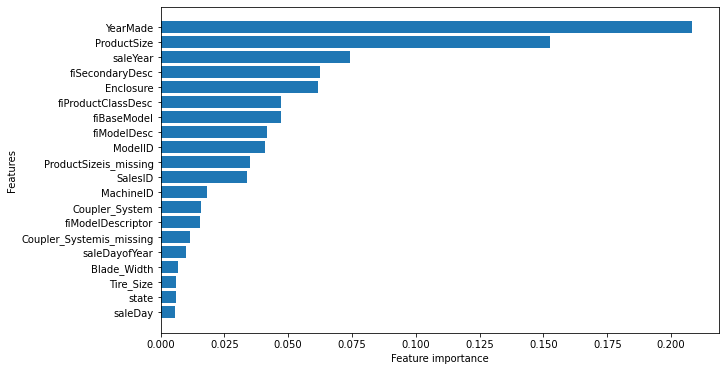

In [177]:
plot_features(X_train.columns,ideal_model.feature_importances_)

In [184]:
X_train["YearMade"].value_counts()

1000    38185
1998    21221
2005    20587
2004    20020
1997    18905
        ...  
2012        1
1937        1
1942        1
1949        1
1947        1
Name: YearMade, Length: 72, dtype: int64

**Question to finish** Why might feature importance of a trained machine learning model would be helpful ?**

**What other models could we use ?**

We can check out regression model or we can use CatBoost.ai and XGBoost.ai